# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import svm

# Load the data

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Data preprocessing

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
data.shape

(284807, 31)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:>

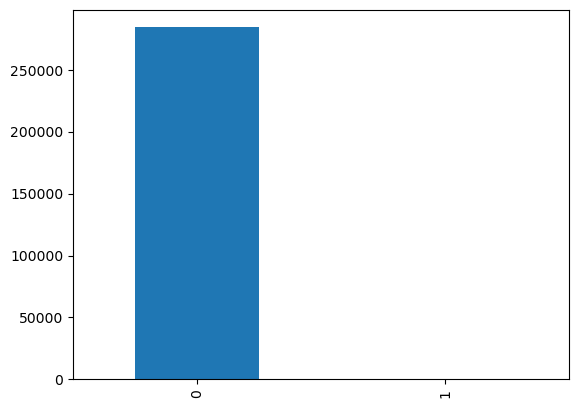

In [11]:
data['Class'].value_counts().plot(kind = 'bar')

In [12]:
non_fraud = data[data.Class == 0]
fraud = data[data.Class == 1]

In [13]:
non_fraud.shape

(284315, 31)

In [14]:
fraud.shape

(492, 31)

In [15]:
non_fraud_sample = non_fraud.sample(600)

In [16]:
non_fraud_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
243676,152025.0,1.923757,-0.307650,-0.583601,1.013789,-0.066944,0.551655,-0.629029,0.295351,0.860547,...,-0.167286,-0.518926,0.310135,-0.013708,-0.346379,-0.952269,0.037735,-0.032846,25.00,0
53928,46216.0,-1.207648,1.799487,0.738642,-0.478710,0.478658,-0.532379,1.026557,-0.388602,0.943794,...,-0.575366,-0.917756,-0.121258,-0.533853,0.151434,0.091327,0.443696,-0.054367,1.98,0
4624,3991.0,-0.389821,-2.489509,0.705666,2.784375,-1.437390,1.316259,0.022338,0.191382,1.558298,...,0.368734,-0.069233,-0.722052,0.085059,0.004283,1.039212,-0.180709,0.123622,756.74,0
116415,74267.0,1.268294,-0.288489,-0.953110,-0.282350,1.851644,3.679014,-0.737498,0.911420,0.515592,...,-0.160039,-0.382440,-0.107981,1.058763,0.705632,0.426102,-0.012741,0.006107,11.50,0
271011,164372.0,0.122899,0.852682,-0.137670,-0.831959,0.921745,-0.529985,0.991044,-0.144903,0.016121,...,-0.329404,-0.756377,-0.064767,-1.008308,-0.348944,0.202559,0.247072,0.086831,1.29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72589,54768.0,-0.261590,0.769589,1.433748,0.284615,0.120014,-0.373443,0.453343,0.019740,-0.470954,...,0.086281,0.295726,-0.027774,0.115826,-0.653497,0.435383,0.135303,0.153885,1.69,0
102245,68102.0,1.048036,0.061275,0.884158,1.586762,-0.591225,-0.262552,-0.072627,-0.007387,0.397034,...,0.008562,0.266909,-0.042398,0.642461,0.569358,-0.307233,0.055728,0.032099,38.72,0
44574,41999.0,0.977897,-1.521507,1.597107,0.030349,-2.259977,-0.009171,-1.308402,0.143069,0.628596,...,0.252633,0.732085,-0.191590,0.807556,0.383354,-0.090676,0.056852,0.058943,165.00,0
78030,57334.0,-0.578629,0.502477,1.382934,0.588721,0.430959,-1.211328,0.268892,-0.042279,-0.462400,...,-0.136720,-0.582146,0.125550,0.325427,-0.638710,0.109075,0.101095,0.171033,1.98,0


In [17]:
new_data = pd.concat([non_fraud_sample,fraud], axis =0)

In [18]:
new_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
243676,152025.0,1.923757,-0.307650,-0.583601,1.013789,-0.066944,0.551655,-0.629029,0.295351,0.860547,...,-0.167286,-0.518926,0.310135,-0.013708,-0.346379,-0.952269,0.037735,-0.032846,25.00,0
53928,46216.0,-1.207648,1.799487,0.738642,-0.478710,0.478658,-0.532379,1.026557,-0.388602,0.943794,...,-0.575366,-0.917756,-0.121258,-0.533853,0.151434,0.091327,0.443696,-0.054367,1.98,0
4624,3991.0,-0.389821,-2.489509,0.705666,2.784375,-1.437390,1.316259,0.022338,0.191382,1.558298,...,0.368734,-0.069233,-0.722052,0.085059,0.004283,1.039212,-0.180709,0.123622,756.74,0
116415,74267.0,1.268294,-0.288489,-0.953110,-0.282350,1.851644,3.679014,-0.737498,0.911420,0.515592,...,-0.160039,-0.382440,-0.107981,1.058763,0.705632,0.426102,-0.012741,0.006107,11.50,0
271011,164372.0,0.122899,0.852682,-0.137670,-0.831959,0.921745,-0.529985,0.991044,-0.144903,0.016121,...,-0.329404,-0.756377,-0.064767,-1.008308,-0.348944,0.202559,0.247072,0.086831,1.29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


# Values of x and y

In [19]:
x = new_data.drop(['Class'], axis = 1)

In [20]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
243676  152025.0  1.923757 -0.307650 -0.583601  1.013789 -0.066944  0.551655   
53928    46216.0 -1.207648  1.799487  0.738642 -0.478710  0.478658 -0.532379   
4624      3991.0 -0.389821 -2.489509  0.705666  2.784375 -1.437390  1.316259   
116415   74267.0  1.268294 -0.288489 -0.953110 -0.282350  1.851644  3.679014   
271011  164372.0  0.122899  0.852682 -0.137670 -0.831959  0.921745 -0.529985   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [21]:
y = new_data["Class"]

In [22]:
print(y)

243676    0
53928     0
4624      0
116415    0
271011    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 1092, dtype: int64


# Splitting of data into training and testing sets

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.2)

In [24]:
print(x.shape, x_train.shape, x_test.shape)

(1092, 30) (873, 30) (219, 30)


In [25]:
model = LogisticRegression()

In [26]:
model.fit(x_train, y_train)

LogisticRegression()

# Accuracy on training data

In [27]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [28]:
training_data_accuracy

0.9507445589919816

# Accuracy on testing data

In [29]:
x_test_prediction = model.predict(x_test)
testing_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [30]:
testing_data_accuracy

0.9406392694063926

# svm classifier

In [31]:
model2 = svm.SVC(kernel = "linear")

In [32]:
model2.fit(x_train, y_train)

SVC(kernel='linear')

In [33]:
x_train_prediction =model2.predict(x_train)

In [34]:
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [35]:
training_data_accuracy

0.9014891179839634

In [36]:
x_test_prediction = model2.predict(x_test)

In [37]:
testing_data_accuracy = accuracy_score(x_test_prediction, y_test)
testing_data_accuracy

0.9315068493150684